# GCN in a transductive setting for Node betweenness
This notebook shows how a GCN/GraphSAGE model is trained to compute Node betweenness centrality on different graphs

# 1. Codebase

In [61]:
%load_ext autoreload
%autoreload 2
import torch
from torch.nn import *
from TFM_edge_betweenness_model import META1
from TFM_node_betweenness_training import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Selected graphs for HP search

Graphs with higher number of node betweenness.

Analysis of vis_../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle Dataset-----------------------------------
number of graphs in the dataset:  3
num classes:  1
num features:  1
<class 'torch_geometric.data.data.Data'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77

Draw
0.02525252476334572
tensor(0.0253)


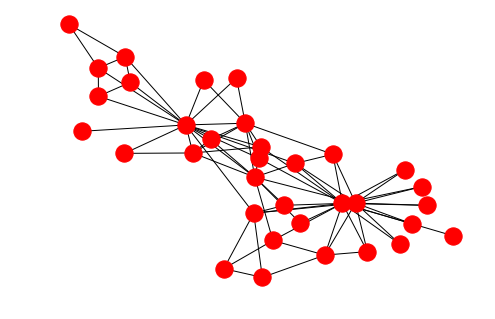

In [150]:
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle'
dataset = loadDataset(collection='MyOwnDataset2',name=dname)
inspectGraphDataset(dataset, 'vis_'+dname)
data = dataset.data
#data.x = torch.ones(len(list(set([n.item() for n in data.edge_index[0]]))))
# data.x is wrong, lately it will be setup to len(nodes) torch.ones(len(nodes))
# transform back to NX

In [151]:
with open('temp/temp_to_nx.txt','w') as f:
    edge_neighbors = data.edge_index.tolist()
    for j in range(len(edge_neighbors[0])):
        f.write(str(edge_neighbors[0][j]) + ' ' + str(edge_neighbors[1][j]) + '\n')
            
    
    
g = nx.read_edgelist('temp/temp_to_nx.txt', nodetype=int)
print()
print("Read graph")
print(g.nodes())
print()
print()
print(g.edges())


Read graph
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (13, 33), (19, 33), (31, 24), (31, 25), (31, 28), (31, 32), (31, 33), (30, 32), (30, 33), (9, 33), (27, 23), (27, 24), (27, 33), (28, 33), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (32, 29), (32, 33), (33, 14), (33, 15), (33, 18), (33, 20), (33, 22), (33, 23), (33, 26), (33, 29), (24, 25), (25, 23), (23, 29), (29, 26)]


In [152]:
#g = pyTorchGeometricDatasetToNx(data)
# compute edge and node betweenness
eb = nx.edge_betweenness_centrality(g,normalized=True)
nb = nx.betweenness_centrality(g,normalized=True)
# save them back to the data instance

In [153]:
data.x=torch.ones(len(list(nb.keys())))
nb

{0: 0.4376352813852815,
 1: 0.05393668831168831,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182782,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.045863395863395856,
 17: 0.0,
 19: 0.03247504810004811,
 21: 0.0,
 31: 0.13827561327561327,
 30: 0.014411976911976905,
 9: 0.0008477633477633478,
 27: 0.022333453583453577,
 28: 0.0017947330447330447,
 32: 0.14524711399711404,
 16: 0.0,
 33: 0.30407497594997596,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 23: 0.017613636363636363,
 14: 0.0,
 15: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0,
 29: 0.0029220779220779218,
 26: 0.0}

In [154]:
eb

{(0, 1): 0.025252525252525245,
 (0, 2): 0.07778768072885717,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783016,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.042371898254251195,
 (0, 17): 0.04012392835922249,
 (0, 19): 0.045936960642843,
 (0, 21): 0.04012392835922249,
 (0, 31): 0.12725999490705367,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.018699601052542224,
 (1, 19): 0.014633732280791106,
 (1, 21): 0.018699601052542224,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732703,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.041192032368502954,
 (2, 28): 0.022782446311858072,
 (2, 32): 0.06898678663384547,
 (3, 7): 0.00

In [155]:
data.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8, 13, 19, 31, 31, 31, 31, 31, 30, 30,  9,
         27, 27, 27, 28, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33,
         33, 33, 23, 23, 25, 29],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 24, 25, 28, 32, 33, 32, 33, 33,
         23, 24, 33, 33, 14, 15, 18, 20, 22, 23, 29, 33, 14, 15, 18, 20, 22, 23,
         26, 29, 25, 29, 24, 26]])

In [ ]:
# match edge_index with index of eb,  then save the eb's in order to data.y!

# set the data.edge_attr to 1's 

# manual training:
# version 1) data.x = 1
# version 2) data.x = degree
# version 3) data.x = node betweenness

# if some result -> write to DOC (even if it's bad)
# then do for page rank & write to DOC


In [157]:
# match edge_index with index of eb
from pprint import pprint
data.edge_attr = torch.ones(len(data.edge_index[0]),1)
#pprint(data.edge_attr)
for j in range(len(data.edge_index[0])):
    t = (str(data.edge_index[0][j].item()), str(data.edge_index[1][j].item())) 
    t2 = (str(data.edge_index[1][j].item()), str(data.edge_index[0][j].item())) 
        
    if t in eb.keys():
        print(t, eb[t])
        data.y[j]=eb[t]
        
    elif t2 in eb.keys():
        print(t2, eb[t2])
        data.y[j]=eb[t2]
    else:
        eb[t]=0.0
        print(t, eb[t])
        data.y[j]=eb[t]
        
    print(t,t2,data.edge_attr[j])
    print(data.y[j])
    print()

('0', '1') 0.0
('0', '1') ('1', '0') tensor([1.])
tensor(0.)

('0', '2') 0.0
('0', '2') ('2', '0') tensor([1.])
tensor(0.)

('0', '3') 0.0
('0', '3') ('3', '0') tensor([1.])
tensor(0.)

('0', '4') 0.0
('0', '4') ('4', '0') tensor([1.])
tensor(0.)

('0', '5') 0.0
('0', '5') ('5', '0') tensor([1.])
tensor(0.)

('0', '6') 0.0
('0', '6') ('6', '0') tensor([1.])
tensor(0.)

('0', '7') 0.0
('0', '7') ('7', '0') tensor([1.])
tensor(0.)

('0', '8') 0.0
('0', '8') ('8', '0') tensor([1.])
tensor(0.)

('0', '10') 0.0
('0', '10') ('10', '0') tensor([1.])
tensor(0.)

('0', '11') 0.0
('0', '11') ('11', '0') tensor([1.])
tensor(0.)

('0', '12') 0.0
('0', '12') ('12', '0') tensor([1.])
tensor(0.)

('0', '13') 0.0
('0', '13') ('13', '0') tensor([1.])
tensor(0.)

('0', '17') 0.0
('0', '17') ('17', '0') tensor([1.])
tensor(0.)

('0', '19') 0.0
('0', '19') ('19', '0') tensor([1.])
tensor(0.)

('0', '21') 0.0
('0', '21') ('21', '0') tensor([1.])
tensor(0.)

('0', '31') 0.0
('0', '31') ('31', '0') tensor([1

In [192]:
# match edge_index with index of eb
from pprint import pprint
data.edge_attr = torch.ones(len(data.edge_index[0]),1)
#pprint(data.edge_attr)
for j in range(len(data.edge_index[0])):
    t = (data.edge_index[0][j].item(), data.edge_index[1][j].item()) 
    t2 = (data.edge_index[1][j].item(), data.edge_index[0][j].item())
        
    if t in eb.keys():
        print(t, eb[t])
        data.y[j]=eb[t]
        
    elif t2 in eb.keys():
        print(t2, eb[t2])
        data.y[j]=eb[t2]
    else:
        eb[t]=0.0
        print(t, eb[t])
        data.y[j]=eb[t]
        
    print(t,t2,data.edge_attr[j])
    print(data.y[j])
    print()
    
data.y = data.y.reshape(-1,1)
data.x = data.x.reshape(-1,1)

(0, 1) 0.025252525252525245
(0, 1) (1, 0) tensor([1.])
tensor([0.0253])

(0, 2) 0.07778768072885717
(0, 2) (2, 0) tensor([1.])
tensor([0.0778])

(0, 3) 0.02049910873440285
(0, 3) (3, 0) tensor([1.])
tensor([0.0205])

(0, 4) 0.0522875816993464
(0, 4) (4, 0) tensor([1.])
tensor([0.0523])

(0, 5) 0.07813428401663694
(0, 5) (5, 0) tensor([1.])
tensor([0.0781])

(0, 6) 0.07813428401663695
(0, 6) (6, 0) tensor([1.])
tensor([0.0781])

(0, 7) 0.0228206434088787
(0, 7) (7, 0) tensor([1.])
tensor([0.0228])

(0, 8) 0.07423959482783016
(0, 8) (8, 0) tensor([1.])
tensor([0.0742])

(0, 10) 0.0522875816993464
(0, 10) (10, 0) tensor([1.])
tensor([0.0523])

(0, 11) 0.058823529411764705
(0, 11) (11, 0) tensor([1.])
tensor([0.0588])

(0, 12) 0.04652406417112298
(0, 12) (12, 0) tensor([1.])
tensor([0.0465])

(0, 13) 0.042371898254251195
(0, 13) (13, 0) tensor([1.])
tensor([0.0424])

(0, 17) 0.04012392835922249
(0, 17) (17, 0) tensor([1.])
tensor([0.0401])

(0, 19) 0.045936960642843
(0, 19) (19, 0) tensor(

In [193]:
data.x

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [194]:
data.edge_attr

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [195]:

data.y

tensor([[0.0253],
        [0.0778],
        [0.0205],
        [0.0523],
        [0.0781],
        [0.0781],
        [0.0228],
        [0.0742],
        [0.0523],
        [0.0588],
        [0.0465],
        [0.0424],
        [0.0401],
        [0.0459],
        [0.0401],
        [0.1273],
        [0.0232],
        [0.0077],
        [0.0074],
        [0.0124],
        [0.0187],
        [0.0146],
        [0.0187],
        [0.0323],
        [0.0224],
        [0.0252],
        [0.0092],
        [0.0308],
        [0.0076],
        [0.0412],
        [0.0228],
        [0.0690],
        [0.0034],
        [0.0123],
        [0.0149],
        [0.0048],
        [0.0030],
        [0.0030],
        [0.0048],
        [0.0294],
        [0.0294],
        [0.0098],
        [0.0304],
        [0.0404],
        [0.0678],
        [0.0594],
        [0.0401],
        [0.0421],
        [0.0149],
        [0.0414],
        [0.0534],
        [0.0171],
        [0.0268],
        [0.0296],
        [0.0105],
        [0

In [196]:
len(data.edge_attr)

78

In [197]:
len(data.x)

34

# 3 Manual training v1

data.x = [1]

In [274]:
%load_ext autoreload
%autoreload 2
import torch
from torch.nn import *
from TFM_edge_betweenness_model import *
from TFM_node_betweenness_training import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332, 0.02867332,
       0.02867332, 0.02867332, 0.02867332, 0.02867332], dtype=float32)
(39,)


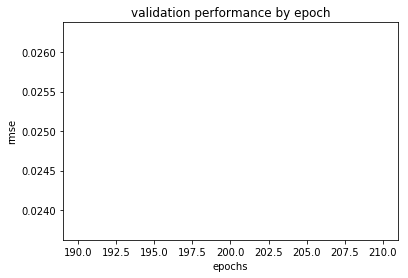

,GTavg,GTmax,GTmin,PREDavg,PREDmax,PREDmin,batch_size,dataset,epochs,hyperparams,nrmse,seed,time
META1-_epochs=200,0.0324326,0.12726,0.00297089,0.0286733,0.0286733,0.0286733,1,,200,_epochs=200,0.025,15,0.713


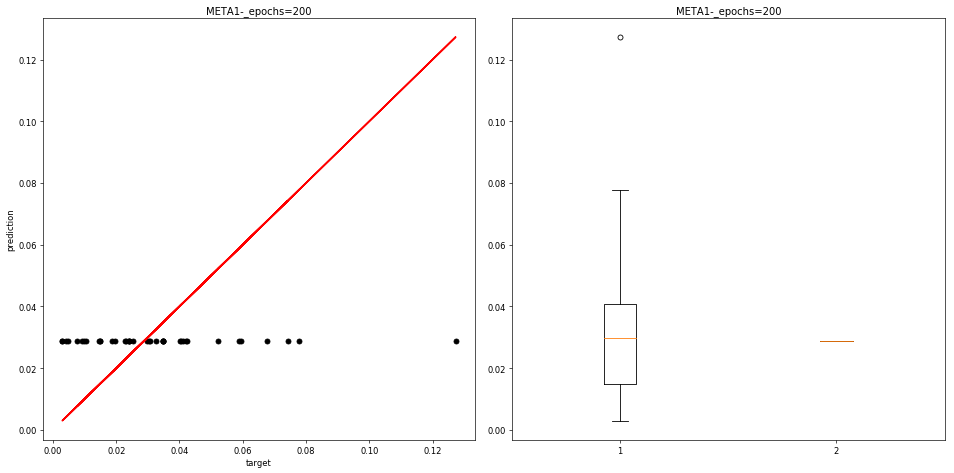

In [281]:
res_dict={'tables':{}, 'scatterplots':{}}
dataset = data
Net = META1(num_edges=len(data.edge_attr))
manual_training(dataset,Net,epochs=200,res_dict=res_dict,seed=15)
#print(res_dict)
reporting(res_dict)

In [175]:
torch.ones(1).shape

torch.Size([1])